## Create a vector of length 4 using seq() function and showcase how to access the elements using numeric indexes, logical indexes and character indexes

In [1]:
seq(1,10, length.out = 4)

[1]  1  4  7 10

In [2]:
x = c(1,2,3,4)
x[2]

[1] 2

In [3]:
x <- c("One" = 1, "Two" = 2, "Three" = 3)
x["Two"]

Two 
  2

In [4]:
a <- c(1,2,3,4)
a[c(TRUE, FALSE, TRUE, FALSE)]

[1] 1 3

## Load the in-built dataset called trees, that consists of measurements of the girth, height, and volume of 31 black cherry trees and display rows where height is greater than 82

In [5]:
subset(trees, Height > 82)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
6,10.8,83,19.7
17,12.9,85,33.8
18,13.3,86,27.4
31,20.6,87,77.0


## Analyze the student’s performance in exams and write your own observations about the students and plot the results

In [6]:
df = read.csv("StudentsPerformance.csv")
head(df)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [7]:
any(is.na(df))

[1] FALSE

In [8]:
summary(df)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [9]:
str(df)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [10]:
df$avg = (df$math.score + df$reading.score + df$writing.score) / 3

In [11]:
df$result = ifelse(df$avg > 33, 'Pass', 'Fail')

In [12]:
head(df)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,avg,result
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>
1,female,group B,bachelor's degree,standard,none,72,72,74,72.66667,Pass
2,female,group C,some college,standard,completed,69,90,88,82.33333,Pass
3,female,group B,master's degree,standard,none,90,95,93,92.66667,Pass
4,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333,Pass
5,male,group C,some college,standard,none,76,78,75,76.33333,Pass
6,female,group B,associate's degree,standard,none,71,83,78,77.33333,Pass


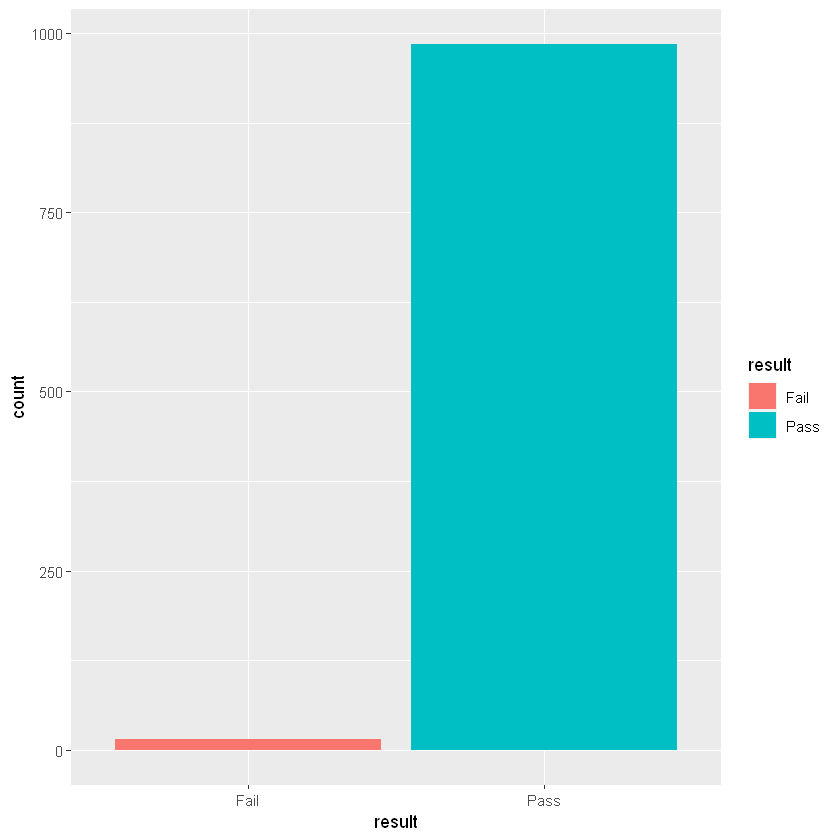

In [13]:
library(ggplot2)
pl <- ggplot(df, aes(result))
pl + geom_bar(aes(fill=result))

## Create a function to remove outliers using the IQR method

In [14]:
outlier = function(dataset,x) {
  Q <- quantile(x, probs = c(0.25, 0.75), na.rm = FALSE)
  iqr <- IQR(x)
  up <- Q[2] + 1.5*iqr
  low <- Q[1] - 1.5*iqr
  eliminated <- subset(dataset, x > low & x < up)
  return(eliminated)
}

df = outlier(df, df$math.score)
df = outlier(df, df$reading.score)
df = outlier(df, df$writing.score)

In [15]:
nrow(df)

[1] 984

## Connect to the above database and convert all the tables into data frame

In [16]:
library("RSQLite")
con <- dbConnect(drv=RSQLite::SQLite(), dbname="chinook.db")

In [17]:
tables <- dbListTables(con)
tables <- tables[tables != "sqlite_sequence"]

In [18]:
lDataFrames <- vector("list", length=length(tables))

In [19]:
for (i in seq(along=tables)) {
  lDataFrames[[i]] <- dbGetQuery(conn=con, statement=paste("SELECT * FROM '", tables[[i]], "'", sep=""))
}

In [20]:
albums = as.data.frame(lDataFrames[1])
artists = as.data.frame(lDataFrames[2])
customers = as.data.frame(lDataFrames[3])
employees=as.data.frame(lDataFrames[4])
genres = as.data.frame(lDataFrames[5])
invoice_items = as.data.frame(lDataFrames[6])
invoices = as.data.frame(lDataFrames[7])
media_types = as.data.frame(lDataFrames[8])
playlist_track = as.data.frame(lDataFrames[9])
playlists = as.data.frame(lDataFrames[10])
sqlite_stat1 = as.data.frame(lDataFrames[11])
tracks = as.data.frame(lDataFrames[12])

## Print the different types of music available

In [21]:
library("sqldf")

sqldf("Select Name from genres")

Loading required package: gsubfn

Loading required package: proto



Name
<chr>
Rock
Jazz
Metal
Alternative & Punk
Rock And Roll
Blues
Latin
Reggae
Pop


## List out all the artists from the entire database

In [22]:
sqldf("Select Name from artists")

Name
<chr>
AC/DC
Accept
Aerosmith
Alanis Morissette
Alice In Chains
Antônio Carlos Jobim
Apocalyptica
Audioslave
BackBeat


## List out all the countries where the customer resides and plot a bar graph showing the number of customers from the respective country

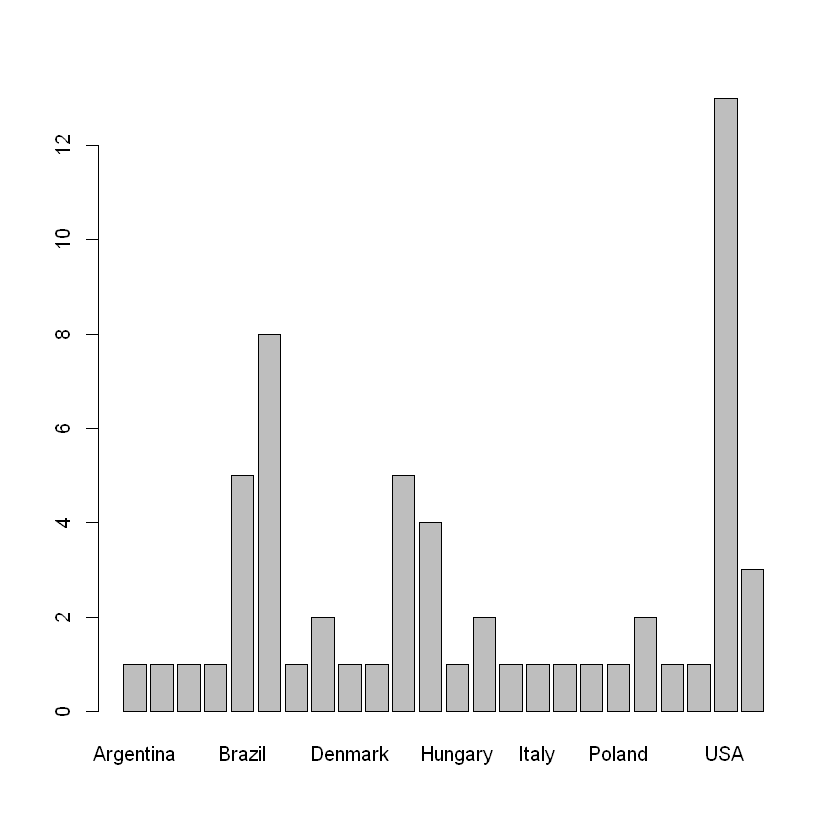

In [23]:
cc=sqldf("Select Country,COUNT(Country) from customers GROUP BY Country ")

barplot(cc$`COUNT(Country)`, names.arg =cc$Country )